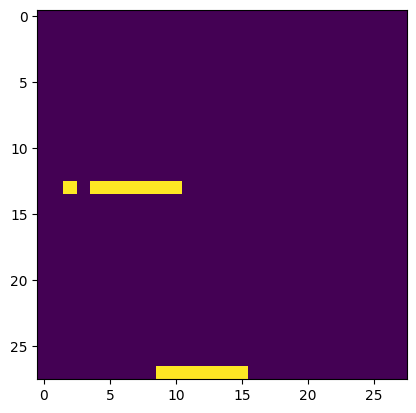

In [20]:
from masks import rf_mask, somatic_mask
import matplotlib.pyplot as plt
img_size = 28
d_mask = rf_mask([img_size,img_size], img_size**2, type='local', rf_size=16)
single_rf = d_mask[0].view(28,28)
s_mask = somatic_mask(20, 10)
plt.imshow(single_rf)
plt.show()

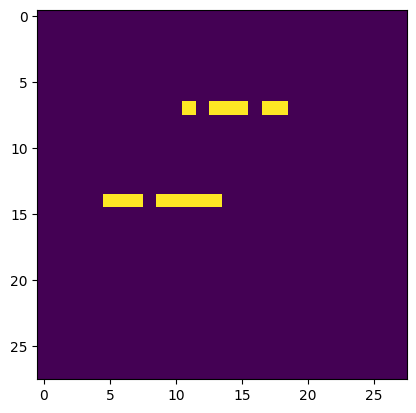

In [21]:
single_rf = d_mask[1].view(28,28)
s_mask = somatic_mask(20, 10)
plt.imshow(single_rf)
plt.show()

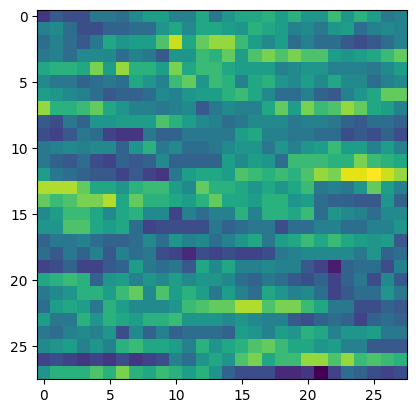

In [22]:
import torch
summed = torch.sum(d_mask.view(-1, 28, 28), dim=0)
summed /= torch.max(summed)
plt.imshow(summed)
plt.show()

In [1]:
from models import dANN, count_parameters
from train import train, test
import torchvision.datasets as datasets
from torchvision.transforms import v2
from torch.utils.data import DataLoader
import os
import torch


train_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),  # Converts to [0,1] range
    v2.Normalize(mean=[0.1307], std=[0.3081])  # MNIST-specific normalization
])


os.makedirs('./data', exist_ok=True)

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(mnist_train, batch_size=16, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=16, shuffle=False)

sample = mnist_train[0]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = dANN([28,28], 256,32,10, 'local').to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.01)
epochs = 5

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')




cuda
209514


Testing: 100%|██████████| 625/625 [00:04<00:00, 151.56it/s]


train loss: 1.7225063505172729, test loss: 1.6521585905075074, test accuracy: 0.8078


Testing: 100%|██████████| 625/625 [00:04<00:00, 151.60it/s]


train loss: 1.6507577699661256, test loss: 1.6272512691497802, test accuracy: 0.8333


 12%|█▏        | 458/3750 [00:04<00:29, 112.18it/s]


KeyboardInterrupt: 